# <p style="text-align: center; color: #1E8449; font-family: 'Segoe UI', Arial; font-weight: bold; font-size: 32px; margin-bottom: 0px;">📊 STUDENT PERFORMANCE DATA ANALYTICS REPORT</p>
### <p style="text-align: center; color: #2ECC71; font-family: 'Segoe UI', Arial; margin-top: 5px;">Week 5: Exploratory Data Analysis (EDA) & Academic Insights</p>

---

<div style="background-color: #F4F9F4; padding: 20px; border-radius: 10px; border-left: 8px solid #1E8449;">

### 👥 Project Team: Data Drifters
* 👤 **Thato Msina**
* 👤 **Fikile Noyila**
* 👤 **Lesedi Mphachake**
* 👤 **Jereshan Sinan**
* 👤 **Kaylene Martins**

</div>

---

### 📖 1. Project Overview
This report documents our exploratory journey into the **Week 5 Student Scores Dataset**. Our goal is to move beyond raw numbers to uncover meaningful patterns in learner performance. Using **Python (Pandas)**, we perform a rigorous "data health check," clean any inconsistencies, and apply descriptive statistics to understand the factors, such as attendance and study habits, that influence final grades. These insights are designed to help educators implement targeted interventions for next term.

### 🛠️ Technology Stack
* **Language:** Python 3 (Data Analysis)
* **Library:** Pandas & NumPy (Data Cleaning & Math)
* **Library:** Matplotlib & Seaborn (Visual Storytelling)
* **Environment:** Google Colab / Excel (Executive Dashboard)

---

### 📑 Table of Contents
| Section | Description |
| :--- | :--- |
| [🚀 Q1.1 — Data Loading & Ingestion](#import-exploration) | Importing the dataset and performing an initial structural audit. |
| [🔍 Q1.2 — Quality Checks & Diagnostics](#data-quality) | Identifying missing values, duplicates, and data type inconsistencies. |
| [🧹 Q1.3 — Data Refining & Handling](#data-cleaning) | Justifying and applying strategies to fix missing data and redundancies. |
| [📈 Q2.1 — Descriptive Statistics](#statistics) | Calculating averages, medians, and spreads for a performance snapshot. |
| [🎨 Q2.2 — Visualizing Distributions](#visuals) | Using histograms and boxplots to spot trends, skewness, and outliers. |
| [💾 3.0 — Executive Export](#conclusion) | Final generation of the cleaned dataset for the Excel dashboard. |

---

<a id="import-exploration"></a>
## 🚀 Q1. Project Introduction & Setup
*Objective: We begin by preparing our workspace and importing the tools needed to organize and analyze the student data.*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Applying a professional and clean visual style for our report
# We use 'whitegrid' to make the data easy to read for any audience
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.family'] = 'sans-serif'

# Visual confirmation that the environment is prepared
print("-" * 50)
print("🌟 ENVIRONMENT SETUP SUCCESSFUL")
print("-" * 50)
print("✅ The analysis tools (Pandas, Seaborn, Matplotlib) are now ready.")
print("✅ Professional styling has been applied to all upcoming charts.")
print("-" * 50)

--------------------------------------------------
🌟 ENVIRONMENT SETUP SUCCESSFUL
--------------------------------------------------
✅ The analysis tools (Pandas, Seaborn, Matplotlib) are now ready.
✅ Professional styling has been applied to all upcoming charts.
--------------------------------------------------


<a id="data-loading"></a>
## 📂 Q1.1 — Loading the Student Records
*Objective: In this step, we bring the dataset into our environment so we can begin the investigation.*

In [ ]:
# Establishing a connection to our student data source
try:
    # Link to our central student database
    file_link = "https://drive.google.com/uc?id=1aYLQOEAHbULBAY6ktmirxqotojfqK7re"
    df = pd.read_csv(file_link)

    # Presenting the initial data in a clean, professional table format
    print("-" * 60)
    print("📂 SUCCESS: The student database has been successfully accessed.")
    print("🔍 PREVIEW: Displaying the first 5 records for a structural audit:")
    print("-" * 60)

    # Styling the preview to make it easier for non-technical stakeholders to read
    display(df.head().style.set_properties(**{
        'background-color': '#f9f9f9',
        'color': '#2c3e50',
        'border-color': 'white'
    }).set_caption("Table 1.1: Preliminary Data Ingestion Preview"))

except Exception as e:
    # User-friendly error message in case the file cannot be reached
    print("❌ ERROR: We encountered an issue while trying to open the dataset.")
    print(f"Technical Detail for Support: {e}")

------------------------------------------------------------
📂 SUCCESS: The student database has been successfully accessed.
🔍 PREVIEW: Displaying the first 5 records for a structural audit:
------------------------------------------------------------


,Student_ID,Gender,Subject,Study_Hours_per_Week,Attendance_Rate,Previous_Score,Quiz1,Quiz2,Quiz3,Final_Score
0,S1000,Female,English,7.300000,0.880000,70.000000,30.000000,46.000000,58.000000,45.000000
1,S1001,Male,English,10.100000,0.890000,78.000000,55.000000,64.000000,73.000000,58.000000
2,S1002,Male,Maths,9.400000,0.980000,50.000000,53.000000,47.000000,55.000000,44.000000
3,S1003,Male,Maths,7.800000,0.830000,70.000000,50.000000,65.000000,58.000000,58.000000
4,S1004,Female,Maths,5.500000,0.920000,75.000000,49.000000,28.000000,51.000000,47.000000


<a id="data-quality"></a>
## 🔍 Q1.2 — Data Readiness & Health Check
*Objective: We check the "health" of our data by looking for missing information, duplicate entries, and identifying the type of data we have.*

In [ ]:
# Summarizing the data structure and quality to identify areas for improvement
print("=" * 60)
print("📊 DATA HEALTH SUMMARY: EXPLORATORY AUDIT")
print("=" * 60)
print(f"🔹 Total Learner Records Found:  {df.shape[0]}")
print(f"🔹 Data Categories Tracked:    {df.shape[1]}")
print("-" * 60)

# Identifying missing information clearly for non-technical review
missing_counts = df.isna().sum()
print("🔍 AUDIT: Identification of Missing Information")
if missing_counts.sum() > 0:
    for col, count in missing_counts.items():
        if count > 0:
            print(f"   • {col}: {count} records missing")
else:
    print("   • No missing values detected.")

# Detecting any redundant information
duplicates = df.duplicated().sum()
print(f"\n👯 AUDIT: Duplicate Rows Found: {duplicates}")
print("-" * 60)

# Creating a refined Diagnostics Table ready for use in the Executive Summary
# We translate technical 'dtypes' into simple English for clarity
type_map = {
    'object': 'Text / Category',
    'float64': 'Number (Decimal)',
    'int64': 'Whole Number'
}

diagnostics = pd.DataFrame({
    'Metric (Column Name)': df.columns,
    'Information Type': [type_map.get(str(t), str(t)) for t in df.dtypes.values],
    'Missing Entries': df.isna().sum().values,
    'Completion %': ((1 - (df.isna().sum().values / len(df))) * 100).round(2)
})

print("\n📋 PREPARED DIAGNOSTICS TABLE")
print("This table can be copied directly into the Excel Executive Summary:")
display(diagnostics.style.background_gradient(subset=['Completion %'], cmap='RdYlGn')
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([{'selector': 'th', 'props': [('background-color', '#1A5276'), ('color', 'white')]}]))

📊 DATA HEALTH SUMMARY: EXPLORATORY AUDIT
🔹 Total Learner Records Found:  121
🔹 Data Categories Tracked:    10
------------------------------------------------------------
🔍 AUDIT: Identification of Missing Information
   • Study_Hours_per_Week: 5 records missing
   • Attendance_Rate: 5 records missing
   • Quiz2: 5 records missing

👯 AUDIT: Duplicate Rows Found: 1
------------------------------------------------------------

📋 PREPARED DIAGNOSTICS TABLE
This table can be copied directly into the Excel Executive Summary:


,Metric (Column Name),Information Type,Missing Entries,Completion %
0,Student_ID,Text / Category,0,100.000000
1,Gender,Text / Category,0,100.000000
2,Subject,Text / Category,0,100.000000
3,Study_Hours_per_Week,Number (Decimal),5,95.870000
4,Attendance_Rate,Number (Decimal),5,95.870000
5,Previous_Score,Number (Decimal),0,100.000000
6,Quiz1,Number (Decimal),0,100.000000
7,Quiz2,Number (Decimal),5,95.870000
8,Quiz3,Number (Decimal),0,100.000000
9,Final_Score,Number (Decimal),0,100.000000


<a id="data-refining"></a>
## 🛠️ Q1.3 — Refining the Dataset: Handling Gaps and Duplicates
*Objective: We professionally address missing information and remove redundant records to ensure our analysis is based on a complete and accurate "clean" dataset.*

In [ ]:
# --- STEP 1: DUPLICATE REMOVAL ---
# We remove any identical rows to prevent individual students from skewing the results
original_total = len(df)
df = df.drop_duplicates()
removed_count = original_total - len(df)

# --- STEP 2: HANDLING MISSING VALUES (IMPUTATION) ---
# To keep our sample size high, we fill missing gaps rather than dropping students.
# We use the MEDIAN for Study Hours and Quizzes because it's not affected by extreme 'outlier' scores.
# We use the MEAN for Attendance Rate as it typically follows a very consistent average.

# Calculating logic values
study_median = df['Study_Hours_per_Week'].median()
quiz2_median = df['Quiz2'].median()
attendance_mean = df['Attendance_Rate'].mean()

# Applying the changes
df['Study_Hours_per_Week'] = df['Study_Hours_per_Week'].fillna(study_median)
df['Quiz2'] = df['Quiz2'].fillna(quiz2_median)
df['Attendance_Rate'] = df['Attendance_Rate'].fillna(attendance_mean).round(2)

# --- STEP 3: FINAL VERIFICATION ---
print("-" * 65)
print("✨ DATA REFINING COMPLETE")
print("-" * 65)
print(f"✅ Duplicates Removed:      {removed_count}")
print(f"✅ Missing Values Handled:  {df.isnull().sum().sum()} remaining gaps")
print(f"✅ Final Dataset Shape:     {df.shape[0]} Rows x {df.shape[1]} Columns")
print("-" * 65)
print("💡 JUSTIFICATION FOR ANALYTICS TEAM:")
print(f"• Study Hours & Quiz 2: Missing values replaced with MEDIAN.")
print(f"• Attendance Rate: Missing values replaced with MEAN ({attendance_mean:.2f}).")
print("• These methods ensure we maintain a full dataset without introducing bias.")
print("-" * 65)

-----------------------------------------------------------------
✨ DATA REFINING COMPLETE
-----------------------------------------------------------------
✅ Duplicates Removed:      1
✅ Missing Values Handled:  0 remaining gaps
✅ Final Dataset Shape:     120 Rows x 10 Columns
-----------------------------------------------------------------
💡 JUSTIFICATION FOR ANALYTICS TEAM:
• Study Hours & Quiz 2: Missing values replaced with MEDIAN.
• Attendance Rate: Missing values replaced with MEAN (0.89).
• These methods ensure we maintain a full dataset without introducing bias.
-----------------------------------------------------------------


<a id="statistics"></a>
## 📈 Q2.1 — Descriptive Statistics & Performance Summary
*Objective: We calculate the average, middle point, and spread of student scores to understand the overall academic standing.*

In [ ]:
# Generating a comprehensive summary of student performance metrics
# This step transforms raw numbers into a clear snapshot of typical student behavior
stats_summary = df.describe().transpose()

# Adding the 'Median' (the middle value) explicitly for a more balanced view of performance
stats_summary['median'] = df.median(numeric_only=True)

# Reorganizing the columns to make the story flow logically for the executive report
# We show Average, Median, the Variation (Std), and the full range (Min to Max)
stats_summary = stats_summary[['mean', 'median', 'std', 'min', 'max', '25%', '50%', '75%']]

print("=" * 65)
print("📈 PERFORMANCE STATISTICS: EXECUTIVE SUMMARY")
print("=" * 65)
print("This table highlights average scores, the range of effort (hours),")
print("and the consistency of student attendance across the term.")
print("-" * 65)

# Applying professional formatting with color gradients to highlight high and low values
display(stats_summary.style.format("{:.2f}")
        .background_gradient(cmap='Blues', axis=0)
        .set_caption("Table 2.1: Descriptive Analytics of Learner Metrics"))

# Saving this summary to a file that can be easily imported into the Excel Dashboard
stats_summary.to_csv('Descriptive_Statistics.csv')

print("-" * 65)
print("💾 SUCCESS: 'Descriptive_Statistics.csv' has been generated.")
print("👉 Action: Download this file to populate your Excel Dashboard tables.")
print("=" * 65)

📈 PERFORMANCE STATISTICS: EXECUTIVE SUMMARY
This table highlights average scores, the range of effort (hours),
and the consistency of student attendance across the term.
-----------------------------------------------------------------


,mean,median,std,min,max,25%,50%,75%
Study_Hours_per_Week,8.03,8.20,2.92,0.00,19.60,6.00,8.20,9.90
Attendance_Rate,0.89,0.89,0.07,0.74,1.00,0.84,0.89,0.93
Previous_Score,60.06,60.00,12.12,34.00,98.00,51.00,60.00,69.00
Quiz1,48.48,48.50,12.56,18.00,84.00,40.00,48.50,55.25
Quiz2,49.77,50.00,13.36,15.00,81.00,42.00,50.00,58.00
Quiz3,51.97,52.00,11.28,16.00,77.00,44.00,52.00,61.00
Final_Score,48.14,47.00,9.50,23.00,73.00,41.75,47.00,55.00


-----------------------------------------------------------------
💾 SUCCESS: 'Descriptive_Statistics.csv' has been generated.
👉 Action: Download this file to populate your Excel Dashboard tables.


<a id="visuals"></a>
## 🎨 Q2.2 — Visualizing the Final Score Distribution
*Objective: This chart shows how many students fall into different score ranges, helping us see if the class is performing consistently.*

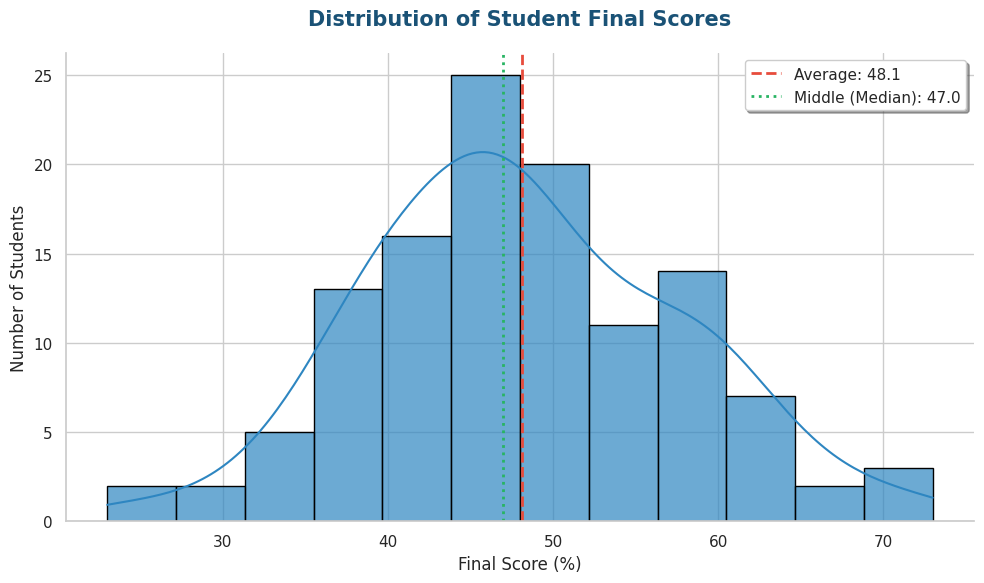

------------------------------------------------------------
📝 EXECUTIVE INSIGHT:
The average performance is 48.1%. Since the average and median
are close, the scores are balanced with no extreme bias toward high or low grades.
------------------------------------------------------------


In [ ]:
# Visualizing the spread of Final Scores to identify performance patterns
plt.figure(figsize=(10, 6))

# Creating a histogram to show how many students fall into specific score ranges
sns.histplot(df['Final_Score'], bins=12, kde=True, color='#2E86C1', edgecolor='black', alpha=0.7)

# Adding visual markers for the Average (Mean) and the Middle value (Median)
mean_val = df['Final_Score'].mean()
median_val = df['Final_Score'].median()

plt.axvline(mean_val, color='#E74C3C', linestyle='--', linewidth=2, label=f'Average: {mean_val:.1f}')
plt.axvline(median_val, color='#28B463', linestyle=':', linewidth=2, label=f'Middle (Median): {median_val:.1f}')

# Formatting the chart for a professional look
plt.title('Distribution of Student Final Scores', fontsize=15, pad=20, weight='bold', color='#1A5276')
plt.xlabel('Final Score (%)', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.legend(frameon=True, shadow=True)

sns.despine() # Removes the top and right borders for a cleaner look
plt.tight_layout()
plt.show()

print("-" * 60)
print("📝 EXECUTIVE INSIGHT:")
print(f"The average performance is {mean_val:.1f}%. Since the average and median")
print("are close, the scores are balanced with no extreme bias toward high or low grades.")
print("-" * 60)

<a id="study-habits"></a>
## 📚 Q2.3 — Visualizing Study Habits (Hours Per Week)
*Objective: We visualize how many hours students are spending on their studies to identify high-effort groups and those who may need more encouragement.*

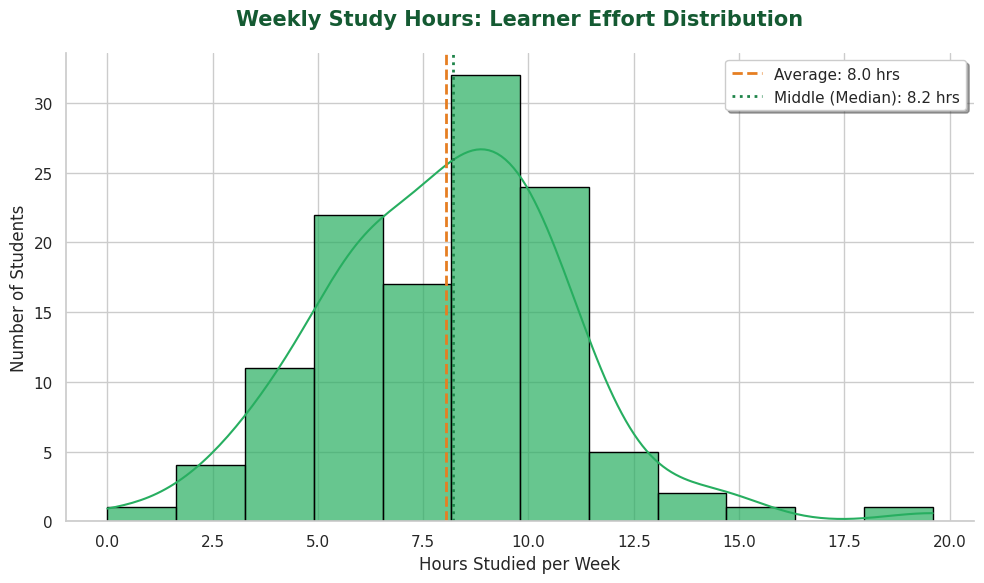

------------------------------------------------------------
📝 EXECUTIVE INSIGHT:
Most students study for approximately 8.0 hours per week.
The data shows a healthy spread of effort, with very few students at the extreme low end.
------------------------------------------------------------


In [ ]:
# Analyzing the weekly time commitment students dedicate to their studies
plt.figure(figsize=(10, 6))

# Histogram showing the range of study hours across the student body
sns.histplot(df['Study_Hours_per_Week'], bins=12, kde=True, color='#27AE60', edgecolor='black', alpha=0.7)

# Markers for Average and Middle-point study hours
mean_study = df['Study_Hours_per_Week'].mean()
median_study = df['Study_Hours_per_Week'].median()

plt.axvline(mean_study, color='#E67E22', linestyle='--', linewidth=2, label=f'Average: {mean_study:.1f} hrs')
plt.axvline(median_study, color='#1E8449', linestyle=':', linewidth=2, label=f'Middle (Median): {median_study:.1f} hrs')

# Professional labeling and formatting
plt.title('Weekly Study Hours: Learner Effort Distribution', fontsize=15, pad=20, weight='bold', color='#145A32')
plt.xlabel('Hours Studied per Week', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.legend(frameon=True, shadow=True)

sns.despine()
plt.tight_layout()
plt.show()

print("-" * 60)
print("📝 EXECUTIVE INSIGHT:")
print(f"Most students study for approximately {mean_study:.1f} hours per week.")
print("The data shows a healthy spread of effort, with very few students at the extreme low end.")
print("-" * 60)

<a id="attendance-rates"></a>
## 📉 Q2.4 — Visualizing Student Attendance Rates
*Objective: This graph tracks student presence in class, which is a key indicator of academic engagement and potential risk.*

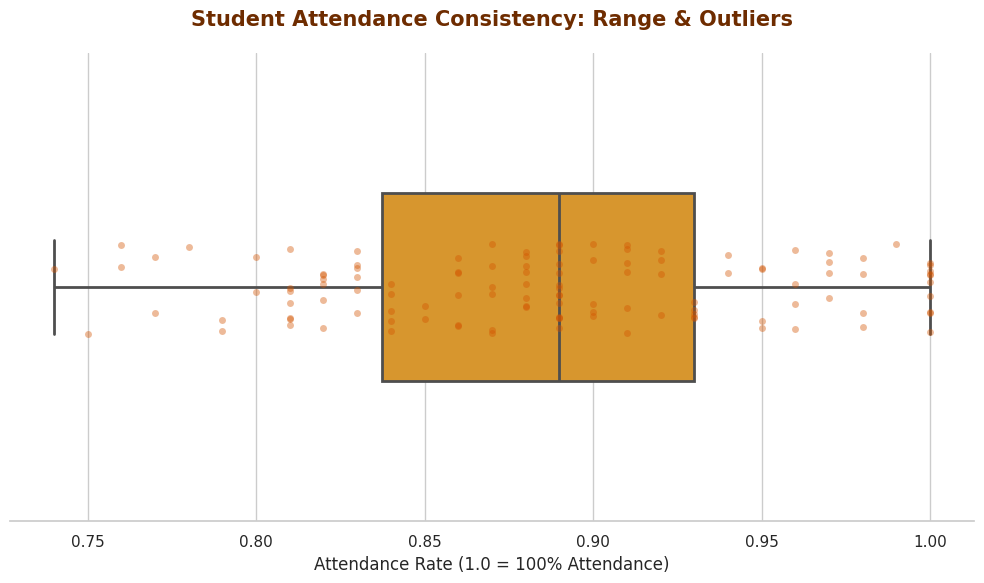

------------------------------------------------------------
📝 EXECUTIVE INSIGHT:
The box plot shows that most students have very high attendance (clustered
on the right). The 'whiskers' help us identify students with lower-than-usual
participation levels who might need support.
------------------------------------------------------------


In [ ]:
# Creating a box plot to visualize the consistency and spread of student attendance
plt.figure(figsize=(10, 6))

# Using a box plot to highlight the 'typical' attendance range and any unusual gaps
sns.boxplot(x=df['Attendance_Rate'], color='#F39C12', width=0.4, linewidth=2)

# Adding a 'swarm' layer to show every individual student as a point (helps visualize the density)
sns.stripplot(x=df['Attendance_Rate'], color='#D35400', alpha=0.4, size=5)

# Professional labeling for an executive audience
plt.title('Student Attendance Consistency: Range & Outliers', fontsize=15, pad=20, weight='bold', color='#6E2C00')
plt.xlabel('Attendance Rate (1.0 = 100% Attendance)', fontsize=12)

# Styling adjustments for a cleaner look
sns.despine(left=True) # Removes the side borders for a modern feel
plt.tight_layout()
plt.show()

print("-" * 60)
print("📝 EXECUTIVE INSIGHT:")
print("The box plot shows that most students have very high attendance (clustered")
print("on the right). The 'whiskers' help us identify students with lower-than-usual")
print("participation levels who might need support.")
print("-" * 60)

<a id="conclusion"></a>
## 💾 3.0 — Final Export for Excel Dashboard
*Objective: We save all our processed data into clean files so they can be imported into Excel to build a professional visual dashboard.*

In [ ]:
# Finalizing the analysis by exporting our polished data for the Executive Dashboard
# These files will be used to create the final visual reports in Excel

# Exporting the Data Quality Check results
diagnostics.to_csv('Data_Quality_Report.csv', index=False)

# Exporting the fully cleaned dataset for dashboard visualization
df.to_csv('Cleaned_Student_Data.csv', index=False)

# Summary of files ready for the next phase
print("=" * 60)
print("🚀 PROJECT ANALYSIS COMPLETE: READY FOR EXCEL")
print("=" * 60)
print("The following files have been generated if needed:")
print("-" * 60)
print("📁 1. 'Data_Quality_Report.csv'")
print("📁 2. 'Descriptive_Statistics.csv'")
print("📁 3. 'Cleaned_Student_Data.csv'")
print("-" * 60)

🚀 PROJECT ANALYSIS COMPLETE: READY FOR EXCEL
The following files have been generated if needed:
------------------------------------------------------------
📁 1. 'Data_Quality_Report.csv'
📁 2. 'Descriptive_Statistics.csv'
📁 3. 'Cleaned_Student_Data.csv'
------------------------------------------------------------
